# Functional RMI in Nutshell

https://arxiv.org/pdf/1304.3880.pdf
    

- Representation of brain connectivity is often called the functional connectome
- "Functional connectivity" is defined as a measure of synchronization in brain signals
- By "functional connectome", here we specifically denote a graph representing functional interactions in the brain

### How to exstimate functional connectome

- Confounding signal : (wiki) variable that influences both the dependent variable and independent variable causing a spurious association

- RoI and atlases

- For  the  problem  of  recovering  the  functional connectivity structure, i.e. finding which region is connected to which, **sparse inverse covariance estimators** have been found to be efficient

- Inverse-covariance matrix, which captures partial correlations, appears then as extracting a backbone or core of the graph




In [1]:
path = ".."

import os
import sys
sys.path.insert(0, path)

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
from problem import get_train_data, get_test_data

data_train_, labels_train_ = get_train_data(path=path)
data_test_, labels_test_ = get_test_data(path=path)

In [3]:
fmri_cols = [c for c in data_train_.columns if "fmri" in c]
fmri_cols

['fmri_basc064',
 'fmri_basc122',
 'fmri_basc197',
 'fmri_craddock_scorr_mean',
 'fmri_harvard_oxford_cort_prob_2mm',
 'fmri_motions',
 'fmri_msdl',
 'fmri_power_2011',
 'fmri_select']

In [4]:
accepted_fmri = data_train_['fmri_select'] > 0

In [5]:
def _load_fmri(fmri_filenames):
    """Load time-series extracted from the fMRI using a specific atlas."""
    return np.array([pd.read_csv(subject_filename,
                                 header=None).values
                     for subject_filename in fmri_filenames])


In [6]:
idx = data_train_.index[0]

In [7]:
path_motions = os.path.join(path, data_train_.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)

In [8]:
path_fmri_msdl = os.path.join(path, data_train_.loc[idx, 'fmri_msdl'])

from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas data stored in 'labels'
labels = atlas['labels']

/opt/conda/envs/rampwf/lib/python3.6/site-packages/numpy/lib/npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [9]:
import numpy as np
import pandas as pd
from nilearn.signal import clean

confounds = np.loadtxt(path_motions)
timeseries = pd.read_csv(path_fmri_msdl, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)

In [10]:
cleaned_timeseries.shape, timeseries.shape

((156, 39), (156, 39))

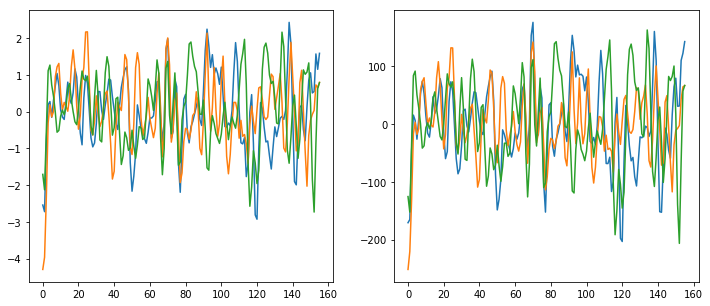

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(cleaned_timeseries[:, :3])
plt.subplot(122)
plt.plot(timeseries[:, :3])

/opt/conda/envs/rampwf/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/envs/rampwf/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/envs/rampwf/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/rampwf/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/rampwf/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/envs/rampwf/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in

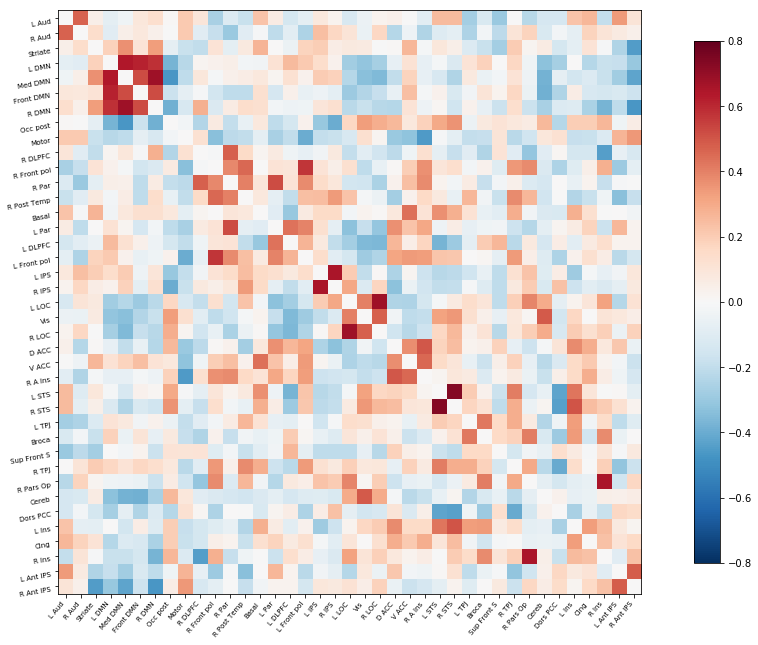

In [12]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]


# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig = plt.figure(figsize=(12, 12))
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True, figure=fig,
                     vmax=0.8, vmin=-0.8)


In [14]:
correlation_matrix.shape

(39, 39)

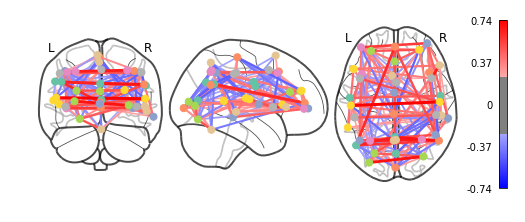

In [13]:
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%", colorbar=True)

plotting.show()



In [88]:
idx = data_train_.index[1]

path_motions = os.path.join(path, data_train_.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)
path_fmri_msdl = os.path.join(path, data_train_.loc[idx, 'fmri_msdl'])
timeseries = pd.read_csv(path_fmri_msdl, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)

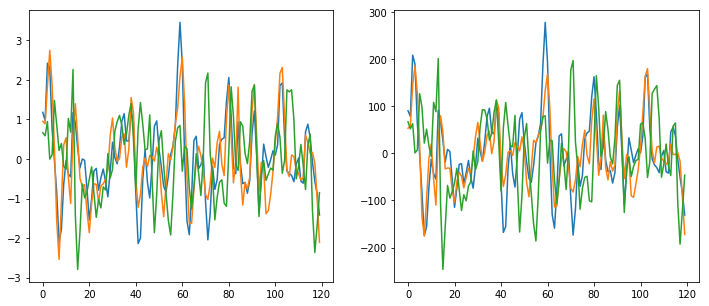

In [89]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(cleaned_timeseries[:, :3])
plt.subplot(122)
plt.plot(timeseries[:, :3])

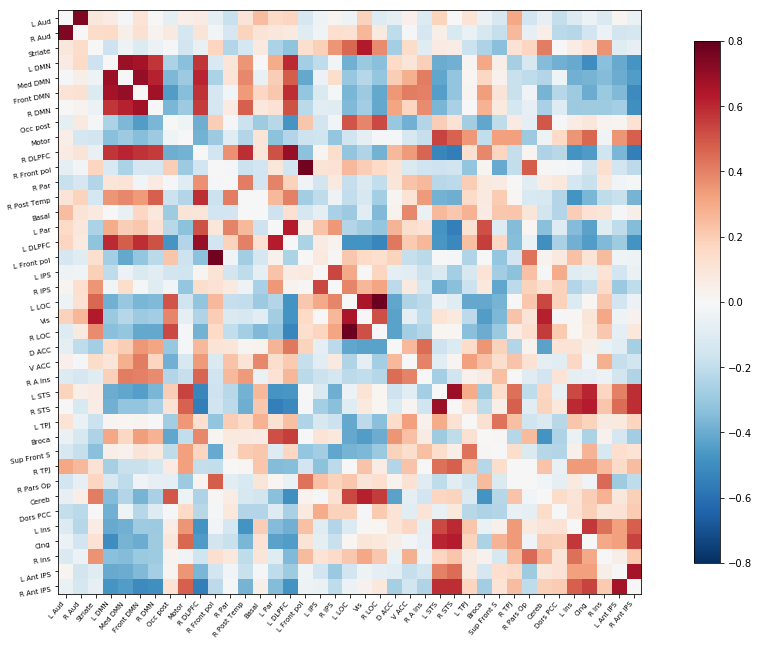

In [90]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]


# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig = plt.figure(figsize=(12, 12))
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True, figure=fig,
                     vmax=0.8, vmin=-0.8)


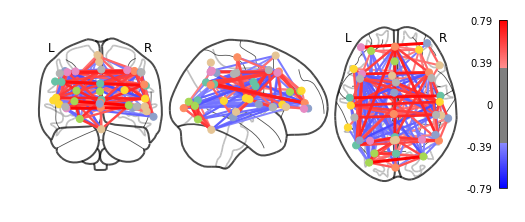

In [91]:
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%", colorbar=True)

plotting.show()



### Atlas Power 2011

In [14]:
from nilearn import datasets
atlas = datasets.fetch_coords_power_2011()

In [15]:
idx = data_train_.index[1]

path_motions = os.path.join(path, data_train_.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)
path_fmri_power = os.path.join(path, data_train_.loc[idx, 'fmri_power_2011'])
timeseries = pd.read_csv(path_fmri_power, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)

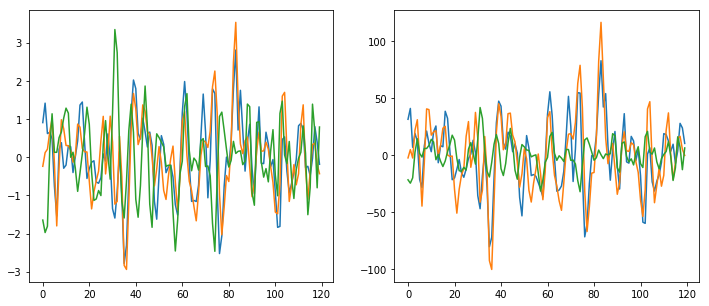

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(cleaned_timeseries[:, :3])
plt.subplot(122)
plt.plot(timeseries[:, :3])

In [17]:
cleaned_timeseries.shape

(120, 264)

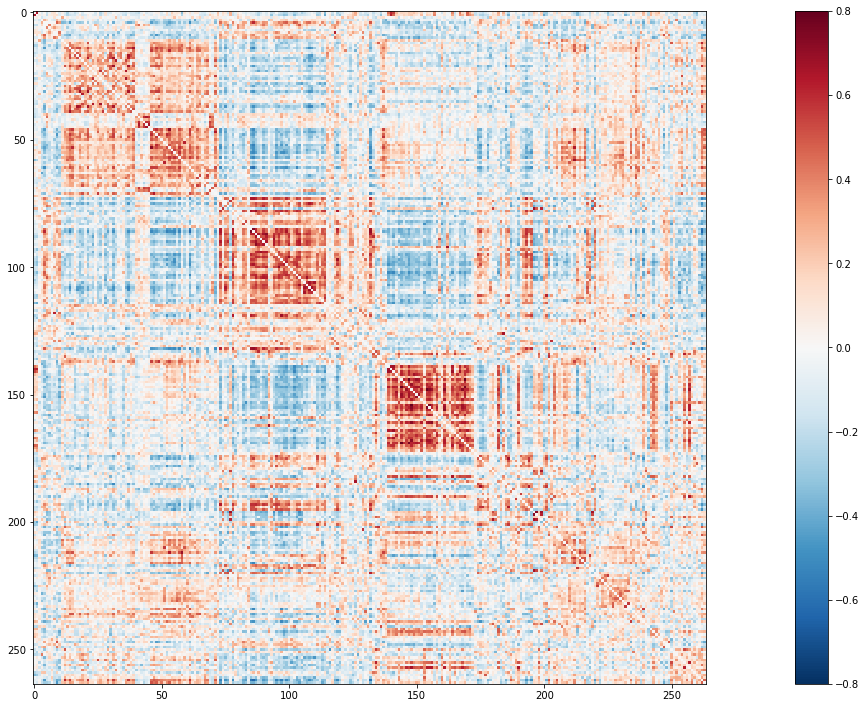

In [18]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]


# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
fig = plt.figure(figsize=(12, 12))
plotting.plot_matrix(correlation_matrix, labels=None, colorbar=True, figure=fig,
                     vmax=0.8, vmin=-0.8)


In [20]:
# from nilearn import plotting
# coords = np.vstack((atlas.rois['x'], atlas.rois['y'], atlas.rois['z'])).T

# # We threshold to keep only the 20% of edges with the highest value
# # because the graph is very dense
# plotting.plot_connectome(correlation_matrix, coords,
#                          edge_threshold="80%", colorbar=True)

# plotting.show()



## Compare mean correlation matrices

In [21]:
from problem import get_train_data, get_test_data

data_train_, labels_train_ = get_train_data(path=path)
data_test_, labels_test_ = get_test_data(path=path)


data_train = pd.concat([data_train_, pd.Series(labels_train_, index=data_train_.index, name='target')], axis=1)

accepted_fmri = data_train['fmri_select'] > 0

In [22]:
data1_train = data_train.loc[accepted_fmri, :]
is_asd = data1_train['target'] > 0

In [23]:
from nilearn.signal import clean
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='covariance', discard_diagonal=True)

In [24]:
mean_no_asd_correlation_matrix = np.zeros((264, 264))

ll = len(data1_train[~is_asd].index)
for i, idx in enumerate(data1_train[~is_asd].index):
    if i % 100 == 0:
        print("-- {}/{}".format(i, ll))
    path_motions = os.path.join(path, data1_train.loc[idx, 'fmri_motions'])
    confounds = np.loadtxt(path_motions)
    path_fmri_atlas = os.path.join(path, data1_train.loc[idx, 'fmri_power_2011'])
    timeseries = pd.read_csv(path_fmri_atlas, header=None).values
    cleaned_timeseries = clean(timeseries, confounds=confounds)
    correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]
    mean_no_asd_correlation_matrix += correlation_matrix

mean_no_asd_correlation_matrix /= ll

-- 0/533
-- 100/533
-- 200/533
-- 300/533
-- 400/533
-- 500/533


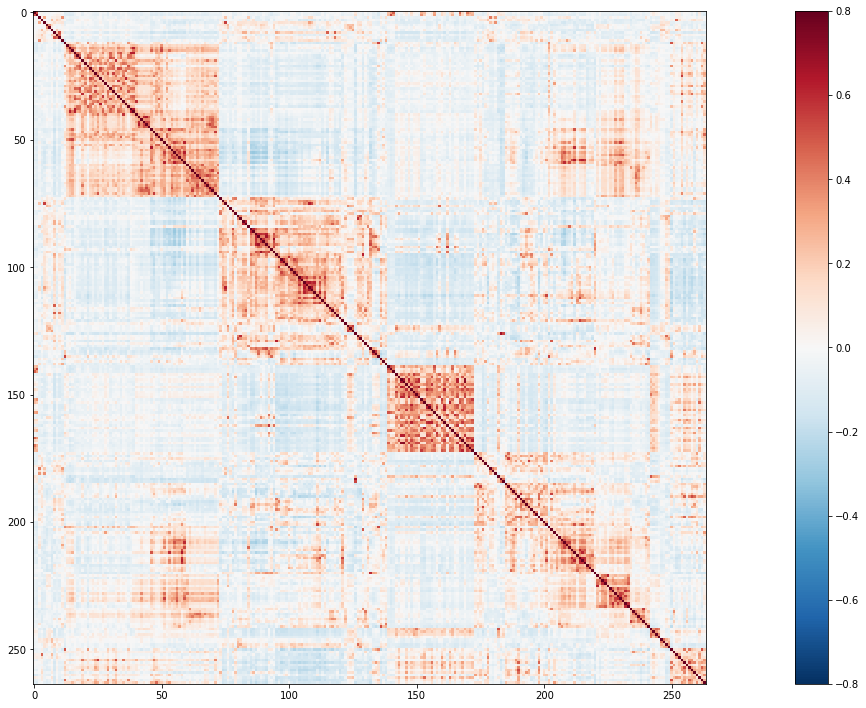

In [25]:
fig = plt.figure(figsize=(12, 12))
plotting.plot_matrix(mean_no_asd_correlation_matrix, labels=None, colorbar=True, figure=fig,
                     vmax=0.8, vmin=-0.8)


In [26]:
mean_asd_correlation_matrix = np.zeros((264, 264))

ll = len(data1_train[is_asd].index)
for i, idx in enumerate(data1_train[is_asd].index):
    if i % 100 == 0:
        print("-- {}/{}".format(i, ll))
    path_motions = os.path.join(path, data1_train.loc[idx, 'fmri_motions'])
    confounds = np.loadtxt(path_motions)
    path_fmri_atlas = os.path.join(path, data1_train.loc[idx, 'fmri_power_2011'])
    timeseries = pd.read_csv(path_fmri_atlas, header=None).values
    cleaned_timeseries = clean(timeseries, confounds=confounds)
    correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]
    mean_asd_correlation_matrix += correlation_matrix

mean_asd_correlation_matrix /= ll

-- 0/474
-- 100/474
-- 200/474
-- 300/474
-- 400/474


In [66]:
i = 15

idx = data1_train[~is_asd].index[i]
path_motions = os.path.join(path, data1_train.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)
path_fmri_atlas = os.path.join(path, data1_train.loc[idx, 'fmri_power_2011'])
timeseries = pd.read_csv(path_fmri_atlas, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)
no_asd_correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]

idx = data1_train[is_asd].index[i]
path_motions = os.path.join(path, data1_train.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)
path_fmri_atlas = os.path.join(path, data1_train.loc[idx, 'fmri_power_2011'])
timeseries = pd.read_csv(path_fmri_atlas, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)
asd_correlation_matrix = correlation_measure.fit_transform([cleaned_timeseries])[0]

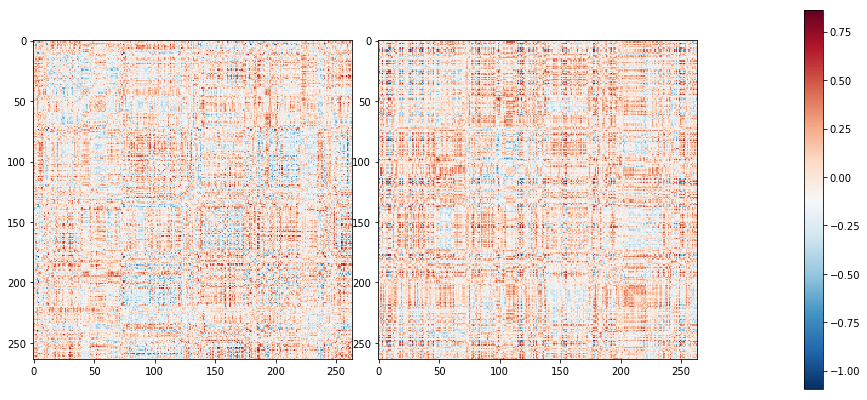

In [67]:
fig = plt.figure(figsize=(12, 12))
plt.subplot(121)
plotting.plot_matrix(no_asd_correlation_matrix - mean_no_asd_correlation_matrix, labels=None, colorbar=True, figure=fig)
plt.subplot(122)
plotting.plot_matrix(asd_correlation_matrix - mean_no_asd_correlation_matrix, labels=None, colorbar=True, figure=fig)


Difference

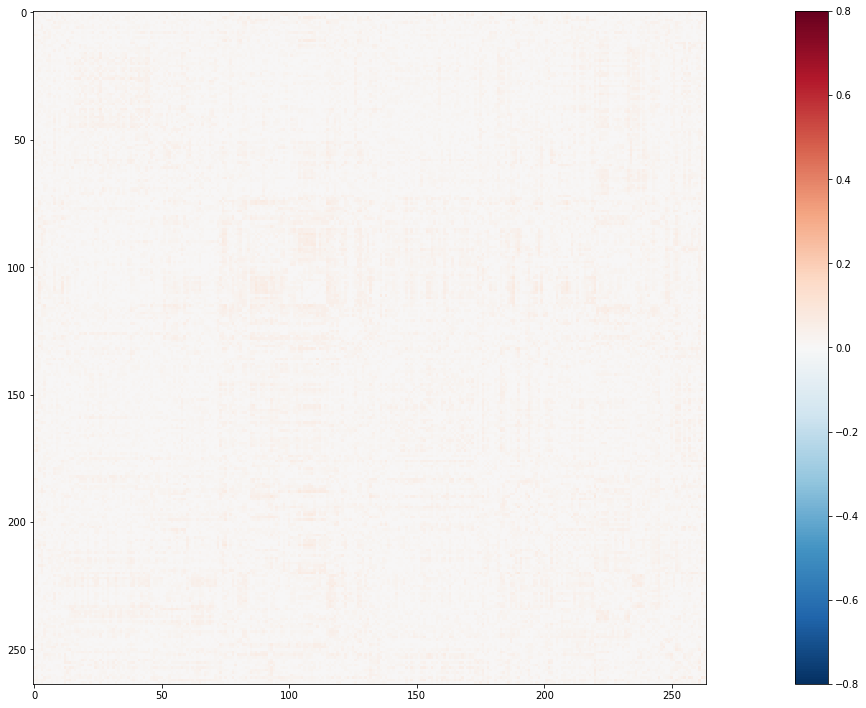

In [115]:
fig = plt.figure(figsize=(12, 12))
plotting.plot_matrix(np.abs(mean_asd_correlation_matrix - mean_no_asd_correlation_matrix), labels=None, colorbar=True, figure=fig,
                     vmax=0.8, vmin=-0.8)


### Altas Power 2011 time series to 3D ROI sequences

In [8]:
from nilearn import datasets
atlas = datasets.fetch_coords_power_2011()

In [15]:
rois = atlas.rois
rois

rec.array([(  1, -25, -98, -12), (  2,  27, -97, -13),
           (  3,  24,  32, -18), (  4, -56, -45, -24),
           (  5,   8,  41, -24), (  6, -21, -22, -20),
           (  7,  17, -28, -17), (  8, -37, -29, -26),
           (  9,  65, -24, -19), ( 10,  52, -34, -27),
           ( 11,  55, -31, -17), ( 12,  34,  38, -12),
           ( 13,  -7, -52,  61), ( 14, -14, -18,  40),
           ( 15,   0, -15,  47), ( 16,  10,  -2,  45),
           ( 17,  -7, -21,  65), ( 18,  -7, -33,  72),
           ( 19,  13, -33,  75), ( 20, -54, -23,  43),
           ( 21,  29, -17,  71), ( 22,  10, -46,  73),
           ( 23, -23, -30,  72), ( 24, -40, -19,  54),
           ( 25,  29, -39,  59), ( 26,  50, -20,  42),
           ( 27, -38, -27,  69), ( 28,  20, -29,  60),
           ( 29,  44,  -8,  57), ( 30, -29, -43,  61),
           ( 31,  10, -17,  74), ( 32,  22, -42,  69),
           ( 33, -45, -32,  47), ( 34, -21, -31,  61),
           ( 35, -13, -17,  75), ( 36,  42, -20,  55),
          

In [ ]:
x_roi_to_index = dict([(v, i) for i, v in enumerate(np.sort(np.unique(rois.x)))])
y_roi_to_index = dict([(v, i) for i, v in enumerate(np.sort(np.unique(rois.y)))])
z_roi_to_index = dict([(v, i) for i, v in enumerate(np.sort(np.unique(rois.z)))])


def timepoint_to_3d(timepoint):
    pass

In [41]:
from problem import get_train_data, get_test_data

data_train_, labels_train_ = get_train_data(path=path)
data_test_, labels_test_ = get_test_data(path=path)


data_train = pd.concat([data_train_, pd.Series(labels_train_, index=data_train_.index, name='target')], axis=1)

accepted_fmri = data_train['fmri_select'] > 0

data1_train = data_train.loc[accepted_fmri, :]
is_asd = data1_train['target'] > 0

In [45]:
from nilearn.signal import clean

idx = data1_train.index[0]
path_motions = os.path.join(path, data1_train.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)
path_fmri_atlas = os.path.join(path, data1_train.loc[idx, 'fmri_power_2011'])
timeseries = pd.read_csv(path_fmri_atlas, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)

In [46]:
cleaned_timeseries.shape

(156, 264)

In [8]:
output = np.zeros((len(x_roi_to_index), len(y_roi_to_index), len(z_roi_to_index)))

for i, v in enumerate(tp):
    ix = x_roi_to_index[rois[i].x]
    iy = y_roi_to_index[rois[i].y]
    iz = z_roi_to_index[rois[i].z]
    output[ix, iy, iz] = v

NameError: name 'np' is not defined

In [71]:
import matplotlib.pylab as plt
%matplotlib inline

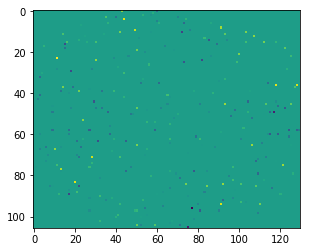

In [75]:
plt.imshow(output.sum(2))

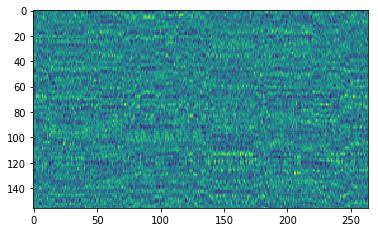

In [76]:
plt.imshow(cleaned_timeseries)

Datasets

In [2]:
from functools import lru_cache

import numpy as np

from torch.utils.data import Dataset

from nilearn.signal import clean


class fMRIDataset(Dataset):
    
    def __init__(self, data_df, labels, fmri_type, path):
        assert fmri_type in [c for c in data_df.columns if "fmri" in c]
        self.df = data_df
        self.targets = labels
        self.fmri_type = fmri_type
        self.path = path
        
    def __len__(self):
        return len(self.targets)

    @lru_cache(maxsize=1024)
    def __getitem__(self, i):
        idx = self.df.index[i]
        path_motions = os.path.join(self.path, self.df.loc[idx, 'fmri_motions'])
        confounds = np.loadtxt(path_motions)
        path_fmri_atlas = os.path.join(self.path, self.df.loc[idx, self.fmri_type])
        timeseries = pd.read_csv(path_fmri_atlas, header=None).values
        cleaned_timeseries = clean(timeseries, confounds=confounds)
        return cleaned_timeseries, self.targets[i]
    

class TransformedDataset(Dataset):
    
    def __init__(self, ds, transform):
        self.ds = ds
        self.transform = transform
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, index):
        return self.transform(self.ds[index])

In [3]:
from problem import get_train_data, get_test_data

data_train_, labels_train_ = get_train_data(path=path)
data_test_, labels_test_ = get_test_data(path=path)

In [4]:
from sklearn.model_selection import StratifiedKFold

seed = 17
n_splits = 7

splt = StratifiedKFold(n_splits=n_splits, random_state=seed)

pipes = []
X_test = data_test_
y_test = labels_test_


train_indices, val_indices = next(splt.split(data_train_, labels_train_))

train_idx = data_train_.index[train_indices]
val_idx = data_train_.index[val_indices]

train_dataset = fMRIDataset(data_train_.loc[train_idx, :], labels_train_[train_indices], 'fmri_power_2011', path)
val_dataset = fMRIDataset(data_train_.loc[val_idx, :], labels_train_[val_indices], 'fmri_power_2011', path)

In [26]:
from torchvision.transforms import Compose, ToTensor, Normalize

img_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.0, ], std=[5.0, ])
])


max_heigth = 180


def data_transform(dp):
    img, t = dp
    # crop or pad to (180, 264)
    h, w = img.shape
    if h < max_heigth:
        n_img = np.pad(img, ((0, max_heigth - h), (0, 0)), mode='constant')    
    else:
        n_img = img[:max_heigth, :]
    n_img = np.expand_dims(n_img, axis=-1).astype(np.float32)
    n_img = img_transform(n_img)
    return n_img, t    

In [27]:
from torch.utils.data import DataLoader

train_tf_dataset = TransformedDataset(train_dataset, transform=data_transform)
val_tf_dataset = TransformedDataset(val_dataset, transform=data_transform)

train_loader = DataLoader(train_tf_dataset, batch_size=16, num_workers=12, shuffle=True)
val_loader = DataLoader(val_tf_dataset, batch_size=16, num_workers=12, shuffle=False)

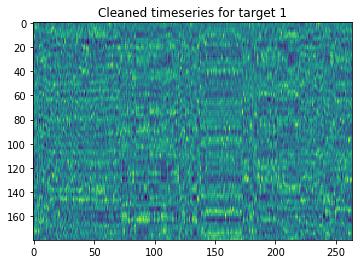

In [28]:
dp = train_tf_dataset[133]
plt.title("Cleaned timeseries for target {}".format(dp[1]))
plt.imshow(dp[0].numpy()[0, :, :])

In [29]:
for batch in train_loader:
    pass

for batch in val_loader:
    pass

Model

In [30]:
import torch.nn as nn


In [39]:
stem = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
    nn.Conv2d(32, 32, kernel_size=(1, 11), stride=(1, 1), padding=0),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, kernel_size=(3, 1), stride=(1, 1), padding=1),
    nn.Conv2d(32, 32, kernel_size=(1, 7), stride=(1, 1), padding=0),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2)
)

In [40]:
dp[0].unsqueeze(0).shape

torch.Size([1, 1, 180, 264])

In [41]:
stem(dp[0].unsqueeze(0)).shape

torch.Size([1, 32, 90, 125])

In [63]:
import torch.nn as nn


class fMRI_ASD_Classification(nn.Module):
    
    def __init__(self):
        super(fMRI_ASD_Classification, self).__init__()
        
        self.stem = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(32, 32, kernel_size=(1, 11), stride=(1, 1), padding=0),            
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(32, 32, kernel_size=(1, 7), stride=(1, 1), padding=0),           
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        
        self.features = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(64, 64, kernel_size=(1, 7), stride=(1, 1), padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv1d(64, 64, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(64, 64, kernel_size=(1, 7), stride=(1, 1), padding=0),            
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv1d(64, 128, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(128, 128, kernel_size=(1, 7), stride=(1, 1), padding=0),            
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv1d(128, 128, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(128, 128, kernel_size=(1, 7), stride=(1, 1), padding=0),            
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv1d(128, 256, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(256, 256, kernel_size=(1, 5), stride=(1, 1), padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv1d(256, 256, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(256, 256, kernel_size=(1, 5), stride=(1, 1), padding=0),            
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv1d(256, 512, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(512, 512, kernel_size=(1, 3), stride=(1, 1), padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv1d(512, 512, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(512, 512, kernel_size=(1, 3), stride=(1, 1), padding=0),            
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)            
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(2560, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2)            
        )        
        
    def forward(self, x):        
        f = self.stem(x)
        f = self.features(f)
        f = f.view(f.shape[0], -1)
        y = self.classifier(f)
        return y

In [80]:
from torch.optim import SGD


model = fMRI_ASD_Classification()
optimizer = SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [81]:
from ignite.engine import create_supervised_trainer, create_supervised_evaluator, Events
from ignite.metrics import CategoricalAccuracy, Loss


trainer = create_supervised_trainer(model, optimizer, criterion)

metrics = {
    'loss': Loss(criterion),
    'accuracy': CategoricalAccuracy(),
}

train_evaluator = create_supervised_evaluator(model, metrics=metrics)
val_evaluator = create_supervised_evaluator(model, metrics=metrics)

In [82]:
log_interval = 10

@trainer.on(Events.ITERATION_COMPLETED)
def log_training(engine):
    iteration = engine.state.iteration
    if iteration % log_interval == 0:
        print("Training Epoch {} | Iteration {} | Loss {}"
              .format(engine.state.epoch, engine.state.iteration, engine.state.output))    

In [83]:
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_metrics(engine):
    print("Start evaluation on train dataset ...")
    train_metrics = train_evaluator.run(train_loader).metrics
    for name in train_metrics:
        print("{} : {}".format(name, train_metrics[name]))
        

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_metrics(engine):
    print("Start evaluation on validation dataset ...")
    val_metrics = val_evaluator.run(val_loader).metrics
    for name in val_metrics:
        print("{} : {}".format(name, val_metrics[name]))        

In [84]:
trainer.run(train_loader, max_epochs=10)

Process Process-70:
Process Process-63:
Process Process-72:
Process Process-62:
Process Process-71:
Process Process-68:
Process Process-69:
Process Process-66:
Process Process-61:
Process Process-64:
Process Process-65:
Process Process-67:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
 

KeyboardInterrupt
  File "/opt/conda/envs/rampwf/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
KeyboardInterrupt
KeyboardInterrupt
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/envs/rampwf/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
KeyboardInterrupt
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/conda/envs/rampwf/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt

KeyboardInterrupt: 